# Use the Prescient SDK client for searching and accessing raster data

In [1]:
import pystac_client
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

from prescient_sdk.client import PrescientClient

## Create the Prescient SDK client and use it to open the STAC catalog

In [ ]:
# creates the Prescient SDK client using the default configuration
client = PrescientClient()

# opens the STAC catalog using the Prescient SDK client's configuration
# note that this will open your default browser, and prompt you to log in if you are not already logged in
catalog = pystac_client.Client.open(
    client.stac_catalog_url,
    headers = client.headers
)
catalog.title

## Search the STAC catalog

There are many potential methods available to search for an item or a set of items cataloged in STAC

See the pystac-client documentation for more complex examples: https://pystac-client.readthedocs.io/en/stable/usage.html

In [3]:
# this search is just returning the first STAC item in the catalog
results = catalog.search(max_items=1)
items = list(results.items())

## Access the STAC item using Rasterio

The item found in the STAC search (previous cell) can be accessed from the S3 bucket in AWS

The client provides an AWS Session which can be used by rasterio to access AWS resources

Using rasterio you can access, process, and manipulate the data

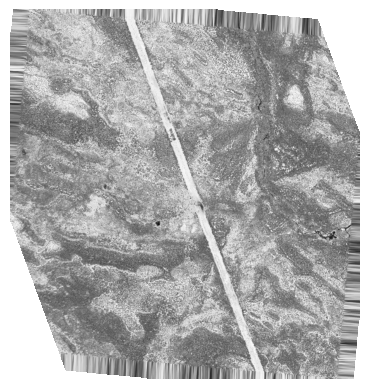

In [5]:
# fetch the item URI and open it with rasterio
fig, ax = plt.subplots()

with rasterio.Env(session=client.session) as env:
    for item in items:
        asset = item.assets["INT"]
        with rasterio.open(asset.href) as src:
            ax = show(src, ax=ax, cmap="gray")
            ax.set_axis_off()